In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/drive/MyDrive/bitcoin_price_bitcoin_price.2013Apr-2017Aug.csv')
data
import seaborn as sns


from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



In [ ]:
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [ ]:
data.shape

(1556, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [ ]:
lis=list(data["Date"])
lis[1][8:12]
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
newdate=[]
date = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for i in range(len(lis)):
  mon=lis[i][0:3]
  string=""
  for j in range(len(month)):
    if month[j]==mon:
      string=date[j]
  
  string=lis[i][8:12]+"-"+string+"-"+lis[i][4:6]
  newdate.append(string)


data["Date"]=newdate

In [ ]:
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [ ]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

y_data = data.loc[(data['Date'] >= '2013-04-28')
                     & (data['Date'] < '2017-07-31')]

In [ ]:
y_data.drop(y_data[['Market Cap','Volume']],axis=1)

,Date,Open,High,Low,Close
1,2017-07-30,2724.39,2758.53,2644.85,2757.18
2,2017-07-29,2807.02,2808.76,2692.80,2726.45
3,2017-07-28,2679.73,2897.45,2679.73,2809.01
4,2017-07-27,2538.71,2693.32,2529.34,2671.78
5,2017-07-26,2577.77,2610.76,2450.80,2529.45
...,...,...,...,...,...
1551,2013-05-02,116.38,125.60,92.28,105.21
1552,2013-05-01,139.00,139.89,107.72,116.99
1553,2013-04-30,144.00,146.93,134.05,139.00
1554,2013-04-29,134.44,147.49,134.00,144.54


In [ ]:
monthvise= y_data.groupby(y_data['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,605.247339,604.677984
February,588.731858,589.029912
March,603.883790,601.783065
April,571.288374,573.599756
May,632.686387,640.195742
June,846.027467,848.166733
July,819.687662,820.518182
August,371.739113,370.078145
September,354.095583,353.672917


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(x=monthvise.index, y=monthvise['Open'], name='Open'))
fig.add_trace(go.Bar(x=monthvise.index, y=monthvise['Close'], name='Close'))
fig.update_layout(barmode='group')
fig.show()



In [ ]:
y_data.groupby(y_data['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_data.groupby(y_data['Date'].dt.strftime('%B'))['High'].max()
monthvise_low = y_data.groupby(y_data['Date'].dt.strftime('%B'))['Low'].min()

fig = go.Figure()
fig.add_trace(go.Bar(x=monthvise_high.index, y=monthvise_high, name='High'))
fig.add_trace(go.Bar(x=monthvise_low.index, y=monthvise_low, name='Low'))
fig.update_layout(barmode='group')

In [ ]:
import plotly.express as px
names = ['Stock Open Price', 'Stock Close Price', 'Stock High Price', 'Stock Low Price', 'Stock Volume']


fig = px.line(y_data, x=y_data.Date, y=[y_data['Open'], y_data['Close'], 
                                          y_data['High'], y_data['Low']],
             labels={'Date': 'Date','value':'Stock value'})
# fig.update_layout(title_text = 'Stock Analysis', font_size = 15, xaxis_title = "Date", yaxis_title = "Price")) 

fig.show()


plotting the analysis yearwise 

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

y_13_data = data.loc[(data['Date'] >= '2013-04-28')
                     & (data['Date'] < '2014-01-01')]

y_13_data.drop(y_13_data[['Market Cap','Volume']],axis=1)

,Date,Open,High,Low,Close
1308,2013-12-31,760.32,760.58,738.17,754.01
1309,2013-12-30,741.35,766.60,740.24,756.13
1310,2013-12-29,728.05,748.61,714.44,745.05
1311,2013-12-28,737.98,747.06,705.35,727.83
1312,2013-12-27,763.28,777.51,713.60,735.07
...,...,...,...,...,...
1551,2013-05-02,116.38,125.60,92.28,105.21
1552,2013-05-01,139.00,139.89,107.72,116.99
1553,2013-04-30,144.00,146.93,134.05,139.00
1554,2013-04-29,134.44,147.49,134.00,144.54


In [ ]:
monthvise1= y_13_data.groupby(y_13_data['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise1 = monthvise1.reindex(new_order, axis=0)
monthvise1

,Open,Close
Date,,
January,NaN,NaN
February,NaN,NaN
March,NaN,NaN
April,137.913333,139.250000
May,120.292258,119.993226
June,108.856333,107.761333
July,90.311613,90.512258
August,113.041935,113.905161
September,130.180667,130.061667


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

y_14_data = data.loc[(data['Date'] >= '2014-01-01')
                     & (data['Date'] < '2015-01-01')]

y_14_data.drop(y_14_data[['Market Cap','Volume']],axis=1)

,Date,Open,High,Low,Close
943,2014-12-31,310.91,320.19,310.21,320.19
944,2014-12-30,312.72,314.81,309.37,310.74
945,2014-12-29,317.70,320.27,312.31,312.67
946,2014-12-28,316.16,320.03,311.08,317.24
947,2014-12-27,327.58,328.91,312.63,315.86
...,...,...,...,...,...
1303,2014-01-05,858.55,952.40,854.52,933.53
1304,2014-01-04,823.27,859.51,801.67,859.51
1305,2014-01-03,802.85,834.15,789.12,818.72
1306,2014-01-02,773.44,820.31,767.21,802.39


In [ ]:
monthvise2= y_14_data.groupby(y_14_data['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise2 = monthvise2.reindex(new_order, axis=0)
monthvise2

,Open,Close
Date,,
January,841.702258,844.168387
February,670.839286,661.618214
March,595.782258,592.200323
April,461.649000,461.362000
May,480.991290,486.651290
June,615.222000,615.917333
July,619.773548,618.025484
August,539.688065,536.087742
September,448.100333,445.186333


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

y_15_data = data.loc[(data['Date'] >= '2015-01-01')
                     & (data['Date'] < '2016-01-01')]

y_15_data.drop(y_15_data[['Market Cap','Volume']],axis=1)

,Date,Open,High,Low,Close
578,2015-12-31,425.88,432.92,418.74,430.57
579,2015-12-30,433.30,434.39,422.08,426.62
580,2015-12-29,422.10,432.98,420.63,432.98
581,2015-12-28,423.34,429.77,418.48,422.28
582,2015-12-27,416.51,424.01,408.88,422.82
...,...,...,...,...,...
938,2015-01-05,265.08,278.34,265.08,274.47
939,2015-01-04,281.15,287.23,257.61,264.19
940,2015-01-03,314.85,315.15,281.08,281.08
941,2015-01-02,314.08,315.84,313.56,315.03


In [ ]:
monthvise3= y_15_data.groupby(y_15_data['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise3 = monthvise3.reindex(new_order, axis=0)
monthvise3

,Open,Close
Date,,
January,251.800000,248.782581
February,232.821429,234.153571
March,269.278710,269.041290
April,235.707667,235.491667
May,237.162258,236.996774
June,236.941333,238.081000
July,278.857742,279.563871
August,252.987742,250.734516
September,233.487667,233.595333


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

y_16_data = data.loc[(data['Date'] >= '2016-01-01')
                     & (data['Date'] < '2017-01-01')]

y_16_data.drop(y_16_data[['Market Cap','Volume']],axis=1)

,Date,Open,High,Low,Close
212,2016-12-31,960.63,963.74,947.24,963.74
213,2016-12-30,972.53,972.53,934.83,961.24
214,2016-12-29,975.13,979.40,954.50,973.50
215,2016-12-28,934.83,975.92,934.83,975.92
216,2016-12-27,908.35,940.05,904.25,933.20
...,...,...,...,...,...
573,2016-01-05,433.07,434.18,429.68,431.96
574,2016-01-04,430.06,434.52,429.08,433.09
575,2016-01-03,433.58,433.74,424.71,430.01
576,2016-01-02,434.62,436.06,431.87,433.44


In [ ]:
monthvise4= y_16_data.groupby(y_16_data['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise4 = monthvise4.reindex(new_order, axis=0)
monthvise4

,Open,Close
Date,,
January,412.805806,410.844516
February,402.304828,404.408276
March,417.261935,416.525161
April,433.487333,434.339333
May,459.237419,461.953871
June,638.544333,642.869667
July,662.977419,661.355484
August,581.238710,579.585161
September,604.613667,605.848333


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=monthvise1.index, y=monthvise1['Open'], name='Open', marker_color= 'rgb(227, 150, 155)'))
fig.add_trace(go.Bar(x=monthvise1.index, y=monthvise1['Close'], name='Close', marker_color='rgb(10, 20, 13)'))
fig.update_layout(barmode='group')
fig.show()
#opening closing rates per month of year 2013

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=monthvise2.index, y=monthvise2['Open'], name='Open', marker_color= 'rgb(11, 150, 155)'))
fig.add_trace(go.Bar(x=monthvise2.index, y=monthvise2['Close'], name='Close', marker_color='rgb(10, 200, 13)'))
fig.update_layout(barmode='group')
fig.show()

In [ ]:
import plotly.express as px
names = ['Stock Open Price', 'Stock Close Price', 'Stock High Price', 'Stock Low Price', 'Stock Volume']


fig = px.line(y_14_data, x=y_14_data.Date, y=[y_14_data['Open'], y_14_data['Close'], 
                                          y_14_data['High'], y_14_data['Low']],
             labels={'Date': 'Date','value':'Stock value'})


fig.show()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=monthvise3.index, y=monthvise3['Open'], name='Open', marker_color= 'rgb(200, 200, 70)'))
fig.add_trace(go.Bar(x=monthvise3.index, y=monthvise3['Close'], name='Close', marker_color='rgb(200, 20, 13)'))
fig.update_layout(barmode='group')
fig.show()

In [ ]:
import plotly.express as px
names = ['Stock Open Price', 'Stock Close Price', 'Stock High Price', 'Stock Low Price', 'Stock Volume']


fig = px.line(y_15_data, x=y_15_data.Date, y=[y_15_data['Open'], y_15_data['Close'], 
                                          y_15_data['High'], y_15_data['Low']],
             labels={'Date': 'Date','value':'Stock value'})

fig.show()


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=monthvise4.index, y=monthvise4['Open'], name='Open', marker_color= 'rgb(200, 10, 155)'))
fig.add_trace(go.Bar(x=monthvise4.index, y=monthvise4['Close'], name='Close', marker_color='rgb(5, 20, 200)'))
fig.update_layout(barmode='group')
fig.show()

LSTM MODEL 

In [ ]:
closedf = data.loc[(data['Date'] >= '2016-01-01')
                     & (data['Date'] < '2017-01-01')]

close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape)

closedf=closedf.iloc[:,[0,4]]
closedf=pd.DataFrame(closedf)
closedf

Total data for prediction:  (366, 7)


,Date,Close
212,2016-12-31,963.74
213,2016-12-30,961.24
214,2016-12-29,973.50
215,2016-12-28,975.92
216,2016-12-27,933.20
...,...,...
573,2016-01-05,431.96
574,2016-01-04,433.09
575,2016-01-03,430.01
576,2016-01-02,433.44


In [ ]:
from sklearn.preprocessing import MinMaxScaler
del closedf['Date'] 
scalar = MinMaxScaler(feature_range=(0, 1))
dataset = scalar.fit_transform(np.array(closedf).reshape(-1,1))

In [ ]:
dataset.shape

(366, 1)

In [ ]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

292 74


In [ ]:
def create_data(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_data(train, time_step)
X_test, y_test = create_data(test, time_step)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(276, 15)
(58, 15)
(276,)
(58,)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)


(276, 15, 1)
(58, 15, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)


In [ ]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
hist = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
9/9 [==============================] - 2s 40ms/step - loss: 0.0725 - val_loss: 0.0019
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 0.0522 - val_loss: 0.0011
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: 0.0346 - val_loss: 0.0015
Epoch 4/200
9/9 [==============================] - 0s 8ms/step - loss: 0.0206 - val_loss: 0.0032
Epoch 5/200
9/9 [==============================] - 0s 8ms/step - loss: 0.0099 - val_loss: 0.0060
Epoch 6/200
9/9 [==============================] - 0s 8ms/step - loss: 0.0042 - val_loss: 0.0089
Epoch 7/200
9/9 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0105
Epoch 8/200
9/9 [==============================] - 0s 8ms/step - loss: 0.0034 - val_loss: 0.0100
Epoch 9/200
9/9 [==============================] - 0s 8ms/step - loss: 0.0031 - val_loss: 0.0088
Epoch 10/200
9/9 [==============================] - 0s 8ms/step - loss: 0.0029 - val_loss: 0.0079
Epoch 11/200
9/9 [==========

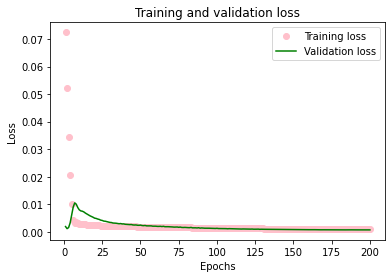

In [ ]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
validation_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss', color = 'pink')
plt.plot(epochs, validation_loss, 'b', label='Validation loss', color = 'green')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predict_train_data = model.predict(X_train)
predict_train_data = scalar.inverse_transform(predict_train_data)
predict_test_data = model.predict(X_test)
predict_test_data = scalar.inverse_transform(predict_test_data)
predict_train_data.shape 
predict_test_data.shape 

y_train2 = scalar.inverse_transform(y_train.reshape(-1,1))
y_test2 = scalar.inverse_transform(y_test.reshape(-1,1))

In [ ]:
print(y_train2.shape)
print(y_test2.shape)


(276, 1)
(58, 1)


In [ ]:
from matplotlib import mathtext
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
print('RMSE Train data:')
print(math.sqrt(mean_squared_error(y_train2, predict_train_data)))
print('MSE Train data:')
print(mean_squared_error(y_train2, predict_train_data))
print('MAE Train data:')
print(mean_absolute_error(y_train2, predict_train_data))

RMSE Train data:
18.44772885776875
MSE Train data:
340.3187000097539
MAE Train data:
11.319708110422322


In [ ]:
print('RMSE test data:')
print(math.sqrt(mean_squared_error(y_test2, predict_test_data)))
print('MSE test data:')
print(mean_squared_error(y_test2, predict_test_data))
print('MAE test data:')
print(mean_absolute_error(y_test2, predict_test_data))


RMSE test data:
15.527777701212402
MSE test data:
241.11188033826912
MAE test data:
12.992112279431577


In [ ]:
from sklearn.metrics import r2_score
print('r2 score Train data:')
print(r2_score(y_train2, predict_train_data))
print('r2 score test data:')
print(r2_score(y_test2, predict_test_data))


r2 score Train data:
0.9720363002209464
r2 score test data:
0.6580129557010904


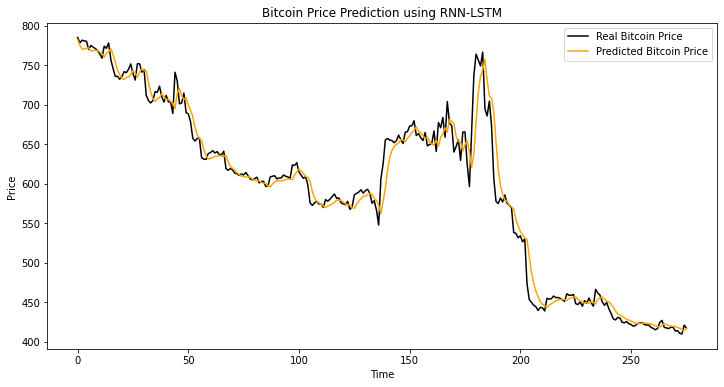

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_train2, color = 'black', label = 'Real Bitcoin Price')
plt.plot(predict_train_data, color = 'orange', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

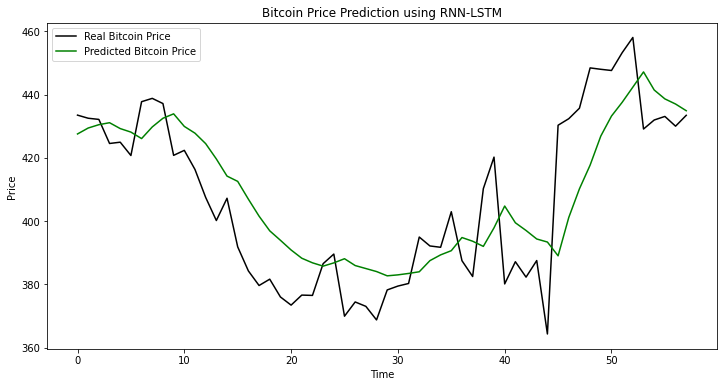

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test2, color = 'black', label = 'Real Bitcoin Price')
plt.plot(predict_test_data, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

MODEL BUILDING

In [ ]:
closedf = data

close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape)

closedf=closedf.iloc[:,[0,4]]
closedf=pd.DataFrame(closedf)
closedf

Total data for prediction:  (1556, 7)


,Date,Close
0,2017-07-31,2875.34
1,2017-07-30,2757.18
2,2017-07-29,2726.45
3,2017-07-28,2809.01
4,2017-07-27,2671.78
...,...,...
1551,2013-05-02,105.21
1552,2013-05-01,116.99
1553,2013-04-30,139.00
1554,2013-04-29,144.54


In [ ]:
from sklearn.preprocessing import MinMaxScaler
del closedf['Date'] 
scalar = MinMaxScaler(feature_range=(0, 1))
dataset = scalar.fit_transform(np.array(closedf).reshape(-1,1))

In [ ]:
dataset.shape

(1556, 1)

In [ ]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1244 312


In [ ]:
def create_data(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

time_step = 15
X_train, y_train = create_data(train, time_step)
X_test, y_test = create_data(test, time_step)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(1228, 15)
(296, 15)
(1228,)
(296,)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)


(1228, 15, 1)
(296, 15, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
1228/1228 - 15s - loss: 0.0023 - 15s/epoch - 12ms/step
Epoch 2/100
1228/1228 - 16s - loss: 0.0010 - 16s/epoch - 13ms/step
Epoch 3/100
1228/1228 - 13s - loss: 8.0437e-04 - 13s/epoch - 11ms/step
Epoch 4/100
1228/1228 - 8s - loss: 5.9446e-04 - 8s/epoch - 7ms/step
Epoch 5/100
1228/1228 - 8s - loss: 5.3476e-04 - 8s/epoch - 7ms/step
Epoch 6/100
1228/1228 - 8s - loss: 3.8126e-04 - 8s/epoch - 7ms/step
Epoch 7/100
1228/1228 - 8s - loss: 3.7031e-04 - 8s/epoch - 7ms/step
Epoch 8/100
1228/1228 - 8s - loss: 2.7063e-04 - 8s/epoch - 6ms/step
Epoch 9/100
1228/1228 - 8s - loss: 3.4350e-04 - 8s/epoch - 7ms/step
Epoch 10/100
1228/1228 - 8s - loss: 3.2337e-04 - 8s/epoch - 7ms/step
Epoch 11/100
1228/1228 - 8s - loss: 3.0733e-04 - 8s/epoch - 7ms/step
Epoch 12/100
1228/1228 - 8s - loss: 3.1064e-04 - 8s/epoch - 7ms/step
Epoch 13/100
1228/1228 - 8s - loss: 2.7903e-04 - 8s/epoch - 7ms/step
Epoch 14/100
1228/1228 - 9s - loss: 2.7422e-04 - 9s/epoch - 7ms/step
Epoch 15/100
1228/1228 - 15s - loss: 2.217

In [ ]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
hist = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
39/39 [==============================] - 2s 11ms/step - loss: 0.0703 - val_loss: 0.0092
Epoch 2/200
39/39 [==============================] - 0s 6ms/step - loss: 0.0247 - val_loss: 0.0081
Epoch 3/200
39/39 [==============================] - 0s 6ms/step - loss: 0.0091 - val_loss: 0.0082
Epoch 4/200
39/39 [==============================] - 0s 6ms/step - loss: 0.0028 - val_loss: 0.0037
Epoch 5/200
39/39 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 6/200
39/39 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0027
Epoch 7/200
39/39 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 8/200
39/39 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 9/200
39/39 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 10/200
39/39 [==============================] - 0s 7ms/step - loss: 9.3354e-04 - val_loss: 0.0021
Epoc

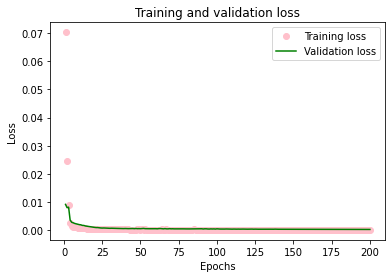

In [ ]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
validation_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss', color = 'pink')
plt.plot(epochs, validation_loss, 'b', label='Validation loss', color = 'green')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predict_train_data = model.predict(X_train)
predict_train_data = scalar.inverse_transform(predict_train_data)
predict_test_data = model.predict(X_test)
predict_test_data = scalar.inverse_transform(predict_test_data)
predict_train_data.shape 
predict_test_data.shape 

y_train2 = scalar.inverse_transform(y_train.reshape(-1,1))
y_test2 = scalar.inverse_transform(y_test.reshape(-1,1))

In [ ]:
print(y_train2.shape)
print(y_test2.shape)


(1228, 1)
(296, 1)


In [ ]:
from matplotlib import mathtext
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
print('RMSE Train data:')
print(math.sqrt(mean_squared_error(y_train2, predict_train_data)))
print('MSE Train data:')
print(mean_squared_error(y_train2, predict_train_data))
print('MAE Train data:')
print(mean_absolute_error(y_train2, predict_train_data))

RMSE Train data:
38.242946523351705
MSE Train data:
1462.522958787938
MAE Train data:
21.37634638733507


In [ ]:
print('RMSE test data:')
print(math.sqrt(mean_squared_error(y_test2, predict_test_data)))
print('MSE test data:')
print(mean_squared_error(y_test2, predict_test_data))
print('MAE test data:')
print(mean_absolute_error(y_test2, predict_test_data))


RMSE test data:
53.792009806220186
MSE test data:
2893.5803189924886
MAE test data:
30.489785388224835


In [ ]:
from sklearn.metrics import r2_score
print('r2 score Train data:')
print(r2_score(y_train2, predict_train_data))
print('r2 score test data:')
print(r2_score(y_test2, predict_test_data))


r2 score Train data:
0.9943408493562063
r2 score test data:
0.9721170360700049


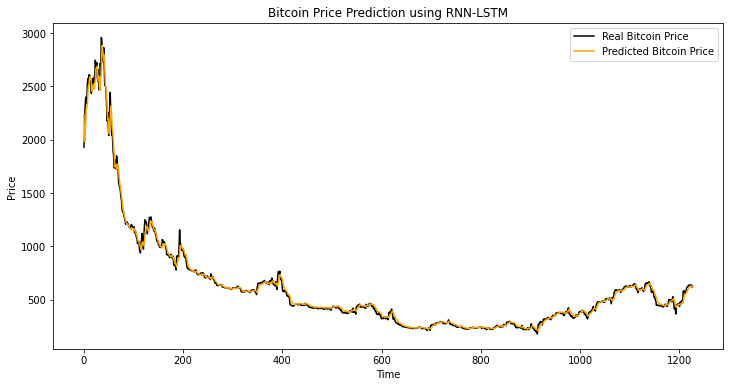

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_train2, color = 'black', label = 'Real Bitcoin Price')
plt.plot(predict_train_data, color = 'orange', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

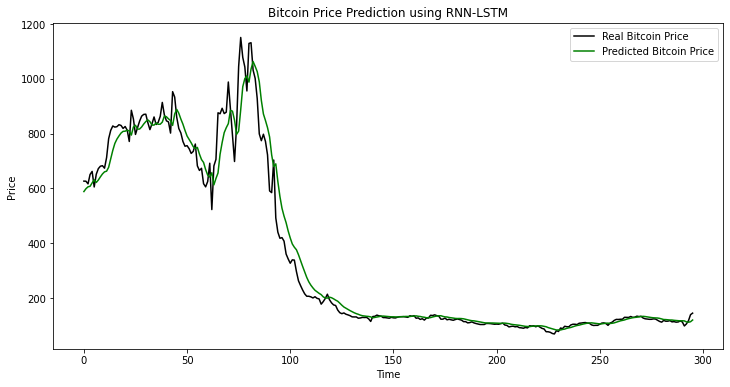

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test2, color = 'black', label = 'Real Bitcoin Price')
plt.plot(predict_test_data, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()